# Log-Normal trials

In [1]:
from nbodykit.lab import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Global parameters
Nc=256
Length=1000 # 1 Gpc h-1

#Set up IC
cosmo = cosmology.Planck15
Plin = cosmology.LinearPower(cosmo, 0)
linear = LinearMesh(Plin, BoxSize=Length, Nmesh=Nc,seed=42)
r = FFTPower(linear, mode="1d", Nmesh=Nc)
k = r.power['k']
Pklin = r.power['power'].real

/home/pcontreras/anaconda3/lib/python3.8/site-packages/nbodykit/source/mesh/linear.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mask = numpy.bitwise_and.reduce([ki == 0 for ki in k])


In [3]:
# Log-normal unbiased (bias=1) catalog
sim_dm = LogNormalCatalog(Plin=Plin, nbar=3e-3, BoxSize=Length, Nmesh=Nc, bias=1.0, seed=42)
mesh = sim_dm.to_mesh(resampler='tsc')
one_plus_delta_dm = mesh.paint(mode='real')
r = FFTPower(sim_dm, mode="1d", Nmesh=Nc)
# shot-noise from nbodykit
Pkdm1 = r.power['power'].real - r.power.attrs['shotnoise']
# calculated shotnoise
ndm = sim_dm.csize
Pkdm2 = r.power['power'].real - 1/(ndm/(Length)**3)

In [4]:
# Log-normal biased (bias=2) catalog
sim_gal = LogNormalCatalog(Plin=Plin, nbar=3e-3, BoxSize=Length, Nmesh=Nc, bias=2.0, seed=42)
mesh = sim_gal.to_mesh(resampler='tsc')
one_plus_delta_gal= mesh.paint(mode='real')
r = FFTPower(sim_gal, mode="1d", Nmesh=Nc)
# shot-noise from nbodykit
Pkg1 = r.power['power'].real - r.power.attrs['shotnoise']
# calculated shotnoise
ngal = sim_gal.csize
Pkg2 = r.power['power'].real - 1/(ngal/(Length**3))

## Obtaining bias

In [5]:
mask = (k <= 0.1)*(k > 0.03)
bg1 = np.sqrt(np.mean(Pkg1[mask]/Pkdm1[mask]))
bg2 = np.sqrt(np.mean(Pkg2[mask]/Pkdm2[mask]))
print('bias (nbodykit noise) = {:.2f}'.format(bg1))
print('bias (calculated noise) = {:.2f}'.format(bg2))

bias (nbodykit noise) = 2.14
bias (calculated noise) = 2.14


Text(0, 0.5, '$P(k)$ $[h^{-3} \\mathrm{Mpc}^3]$')

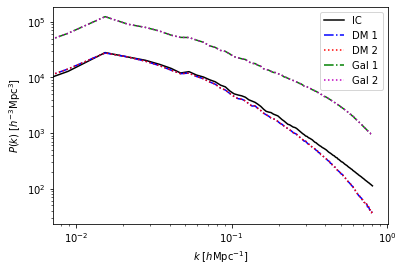

In [6]:
# Compare computed Pk's

plt.loglog(k, Pklin, 'k', label = 'IC')
plt.loglog(k, Pkdm1, '-.b', label = 'DM 1')
plt.loglog(k, Pkdm2, ':r', label = 'DM 2')
plt.loglog(k, Pkg1, '-.g', label = 'Gal 1')
plt.loglog(k, Pkg2, ':m', label = 'Gal 2')
plt.legend()
plt.xlabel(r'$k$ $[h \mathrm{Mpc}^{-1}]$')
plt.ylabel(r'$P(k)$ $[h^{-3} \mathrm{Mpc}^3]$')

/home/pcontreras/anaconda3/lib/python3.8/site-packages/nbodykit/source/mesh/linear.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mask = numpy.bitwise_and.reduce([ki == 0 for ki in k])


Text(0.5, 1.0, 'Log-normal bias=2')

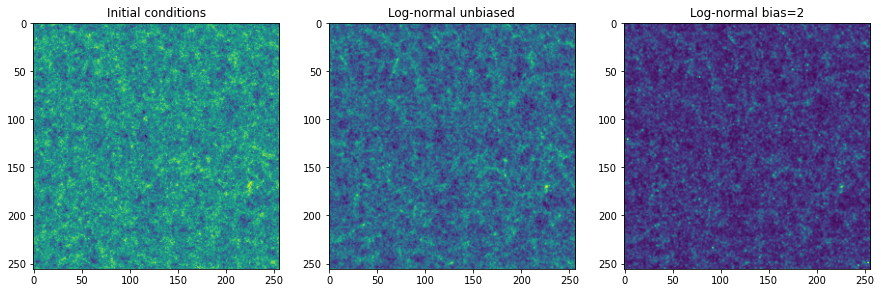

In [7]:
# Compare density fields
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(linear.preview(axes=[0,1]))
ax[0].set_title('Initial conditions')
ax[1].imshow(one_plus_delta_dm.preview(axes=[0,1]))
ax[1].set_title('Log-normal unbiased')
ax[2].imshow(one_plus_delta_gal.preview(axes=[0,1]))
ax[2].set_title('Log-normal bias=2')

## Benchmark code

In [ ]:
#hod['PositionRSD1'] = hod['Position'] + transform.VectorProjection(hod['VelocityOffset'],[0,0,1])
#line_of_sight = np.zeros(hod['Velocity'].shape)
#line_of_sight[:] = np.array([0,0,1])
#dot_prod = np.sum(hod['Velocity']*line_of_sight, axis=1)
#hod['PositionRSD2'] = hod['Position'] + rsd_factor*dot_prod[:, np.newaxis]*line_of_sight

In [ ]:
#one_plus_delta_gRSD1 = hod.to_mesh(resampler='cic', position='PositionRSD1', interlaced=True, compensated=True)
#r = FFTPower(one_plus_delta_gRSD1, mode='1d')
#r = FFTPower(hod, mode='1d', Nmesh=Nc)
#PkgRSD1 = r.power['power'].real - r.attrs['shotnoise']

#one_plus_delta_gRSD2 = hod.to_mesh(resampler='cic', position='PositionRSD2', interlaced=True, compensated=True)
#r = FFTPower(one_plus_delta_gRSD2, mode='1d')
#r = FFTPower(hod, mode='1d', Nmesh=Nc)
#PkgRSD2 = r.power['power'].real - r.attrs['shotnoise']

# Compare Pk's in physical and redshift space
#plt.loglog(k, Pkg1, label='Physical space')
#plt.loglog(k, PkgRSD1, '--',label='Redshift space m1')
#plt.loglog(k, PkgRSD2, ':',label='Redshift space m2')
#plt.legend()
#plt.xlabel(r'$k$ $[h \mathrm{Mpc}^{-1}]$')
#plt.ylabel(r'$P(k)$ $[h^{-3} \mathrm{Mpc}^3]$')

In [ ]:
#fig, ax = plt.subplots(1, 3, figsize=(15, 5))
#ax[0].imshow(one_plus_delta_g.preview(axes=[0,1]))
#ax[0].set_title(r'$1 + \delta_{g}$')
#ax[1].imshow(one_plus_delta_gRSD1.preview(axes=[0,1]))
#ax[1].set_title(r'$1 + \delta_{g}^{s}$')
#ax[2].imshow(one_plus_delta_gRSD2.preview(axes=[0,1]))
#ax[2].set_title(r'$1 + \delta_{g}^{s}$')

In [ ]:
def kernel_x(k,v):
    k2 = sum(ki ** 2 for ki in k) # k^2 on the mesh
    kp = (k2) ** 0.5
    kernel = kp/k2
    kernel[kp==0] = 0.
    vx = v
    vx.real =  kernel*v.imag
    vx.imag = -kernel*v.real
    return vx

def kernel_y(k,v):
    k2 = sum(ki ** 2 for ki in k) # k^2 on the mesh
    kp = (k2) ** 0.5
    kernel = kp/k2
    kernel[kp==0] = 0.
    vx = v
    vy = v
    vy.real =  kernel*v.imag
    vy.imag = -kernel*v.real
    return vy

def kernel_z(k,v):
    k2 = sum(ki ** 2 for ki in k) # k^2 on the mesh
    kp = (k2) ** 0.5
    kernel = kp/k2
    kernel[kp==0] = 0.
    vx = v
    vz = v
    vz.real =  kernel*v.imag
    vz.imag = -kernel*v.real
    return vz

def compute_zeld_1(L, nc, delta):

    deltaf = delta.paint(mode='complex')
    deltar = delta.paint(mode='real')
    
    vfx = np.zeros(deltar.shape, dtype=complex)
    vfy = np.zeros(deltar.shape, dtype=complex)
    vfz = np.zeros(deltar.shape, dtype=complex)
    
    #print(np.min(deltaf))
    kfac = 2.0*np.pi/L
    
    sum_i, sum_j, sum_k = 0, 0, 0
    for i in range(nc):
        for j in range(nc):
            for k in range(int(-nc/2),int(nc/2)+1):

                if i <= nc/2:
                    kx = kfac*np.float64(i)
                    sum_i += 1
                else:
                    kx = -kfac*np.float64(nc-i)
                    sum_i += 1
                if j <= nc/2:
                    ky = kfac*np.float64(j)
                    sum_j +=1
                else:
                    ky = -kfac*np.float64(nc-j)
                    sum_j +=1
                
                sum_k +=1
                kz = kfac*np.float64(k)

                k2 = kx**2 + ky**2 + kz**2

                kernelx = 0.
                kernely = 0.
                kernelz = 0.


    #kernel: -nabla/nabla2 = i*kvec/k2 viene de: d(exp(i*kvec*r))/dr=i*kvec  , d(exp(i*kvec*r))2/dr2=(i*kvec)*(i*kvec)=-k2 

                epsk = 1e-14
                if k2>epsk:
                    kernelx = kx/k2
                    kernely = ky/k2
                    kernelz = kz/k2
                
                vfx.real[i,j,k] =  kernelx*deltaf.imag[i,j,k]
                vfx.imag[i,j,k] = -kernelx*deltaf.real[i,j,k]

                vfy.real[i,j,k] =  kernely*deltaf.imag[i,j,k]
                vfy.imag[i,j,k] = -kernely*deltaf.real[i,j,k]

                vfz.real[i,j,k] =  kernelz*deltaf.imag[i,j,k]
                vfz.imag[i,j,k] = -kernelz*deltaf.real[i,j,k]

    vxg = ifft(vfx)
    vx = vxg.real
    
    vyg = ifft(vfy)
    vy = vyg.real

    vzg = ifft(vfz)
    vz = vzg.real

    vel1D = np.zeros(nc**3 * 3)
    vel   = vel1D.reshape(nc,nc,nc,3)

    vel[:,:,:,0] = vx
    vel[:,:,:,1] = vy
    vel[:,:,:,2] = vz


    return vel

def compute_zeld_2(L, nc, delta):

    deltaf = delta.to_field(mode='complex')
    
    vfx = deltaf.apply(kernel_x, kind='wavenumber')
    vfy = deltaf.apply(kernel_y, kind='wavenumber')
    vfz = deltaf.apply(kernel_z, kind='wavenumber')
    
    vx = vfx.c2r()
    # vx = vxg.real
    
    vy = vfx.c2r()
    # vy = vyg.real

    vz = vfx.c2r()
    # vz = vzg.real

    vel1D = np.zeros(nc**3 * 3)
    vel   = vel1D.reshape(nc,nc,nc,3)

    vel[:,:,:,0] = vx
    vel[:,:,:,1] = vy
    vel[:,:,:,2] = vz

    return vel

In [ ]:
array_delta_g = delta_g.paint(mode='real')
array_delta_gRSD = delta_gRSD.paint(mode='real')
#array_delta_gdiff = delta_gdiff.paint(mode='real')

fig, ax = plt.subplots(1, 2, figsize=(15, 7))
ax[0].imshow(np.sum(array_delta_g[:,:,100:200], axis=2))
ax[0].set_title('Real space')#r'$1 + \delta_{g}$')
ax[1].imshow(np.sum(array_delta_gRSD[:,:,100:200], axis=2))
ax[1].set_title('Redshift space')#r'$1 + \delta_{g}$')
#ax[2].imshow(np.sum(array_delta_gdiff[:,:,100:200], axis=2))
#plt.savefig('overdensities_slices.pdf')

# Obtain cell size to work with physical scales in the smoothing
# one_plus_delta_dm_tilde = ArrayMesh(gaussian_filter(one_plus_delta_g.paint(mode='real')/bg1,\
#                                     sigma=5/cellsize), BoxSize=Length, Nmesh=Nc, interlaced=True, compensated=True)


In [ ]:
# difference between galaxy positions at zobs and zinit
print((hod['PositionRSD']-hod['Position_zinit']).max().compute())

11.104916648367976
